# Fake news detection                                                                     - DEPANDRA & ASHWANI

## IMPORT SECTION 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

## .CSV COMING FROM DATA FOLDER


In [3]:
fake = pd.read_csv("data/Fake.csv")
true = pd.read_csv("data/True.csv")

## SHOW ROWS AND COLUMN

In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape


(21417, 4)

## Data cleaning and preparation

In [6]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'


## MIXING OF  DATA 

In [7]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [8]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)


## SHOWS TOP 5 DATA

In [9]:
# Check the data
data.head()


,title,text,subject,date,target
0,SUPREME COURT JUSTICE Goes All Creepy Predicti...,What the heck is wrong with these loony libera...,politics,"Jul 10, 2016",fake
1,Republicans want tech input on U.S. net neutra...,WASHINGTON (Reuters) - A U.S. congressional co...,politicsNews,"July 31, 2017",true
2,Trump Backers Go Full Birther And Slam Ted Cr...,Donald Trump supporters have taken it upon the...,News,"February 12, 2016",fake
3,Russian economy minister : U.S. sanctions to h...,MOSCOW (Reuters) - Draft new U.S. sanctions ag...,politicsNews,"July 26, 2017",true
4,Robert Parry: US Intel Report on ‘Russian Hack...,Consortium News Exclusive: Despite mainstream ...,US_News,"January 8, 2017",fake


## REMOVING UNNECESSARY FIELD

In [10]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,SUPREME COURT JUSTICE Goes All Creepy Predicti...,What the heck is wrong with these loony libera...,politics,fake
1,Republicans want tech input on U.S. net neutra...,WASHINGTON (Reuters) - A U.S. congressional co...,politicsNews,true
2,Trump Backers Go Full Birther And Slam Ted Cr...,Donald Trump supporters have taken it upon the...,News,fake
3,Russian economy minister : U.S. sanctions to h...,MOSCOW (Reuters) - Draft new U.S. sanctions ag...,politicsNews,true
4,Robert Parry: US Intel Report on ‘Russian Hack...,Consortium News Exclusive: Despite mainstream ...,US_News,fake


In [11]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,What the heck is wrong with these loony libera...,politics,fake
1,WASHINGTON (Reuters) - A U.S. congressional co...,politicsNews,true
2,Donald Trump supporters have taken it upon the...,News,fake
3,MOSCOW (Reuters) - Draft new U.S. sanctions ag...,politicsNews,true
4,Consortium News Exclusive: Despite mainstream ...,US_News,fake


In [12]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,what the heck is wrong with these loony libera...,politics,fake
1,washington (reuters) - a u.s. congressional co...,politicsNews,true
2,donald trump supporters have taken it upon the...,News,fake
3,moscow (reuters) - draft new u.s. sanctions ag...,politicsNews,true
4,consortium news exclusive: despite mainstream ...,US_News,fake


In [13]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [14]:
# Check
data.head()

,text,subject,target
0,what the heck is wrong with these loony libera...,politics,fake
1,washington reuters a us congressional committ...,politicsNews,true
2,donald trump supporters have taken it upon the...,News,fake
3,moscow reuters draft new us sanctions against...,politicsNews,true
4,consortium news exclusive despite mainstream m...,US_News,fake


## TOP 5 DATA

In [15]:
data.head()


,text,subject,target
0,what the heck is wrong with these loony libera...,politics,fake
1,washington reuters a us congressional committ...,politicsNews,true
2,donald trump supporters have taken it upon the...,News,fake
3,moscow reuters draft new us sanctions against...,politicsNews,true
4,consortium news exclusive despite mainstream m...,US_News,fake


## GRAPHS EXPLAINATION 

## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


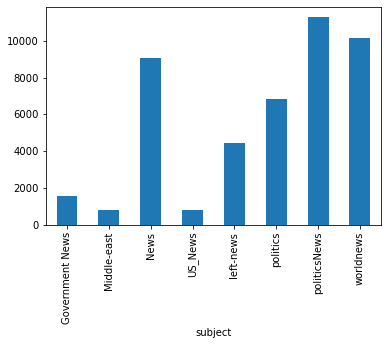

In [17]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


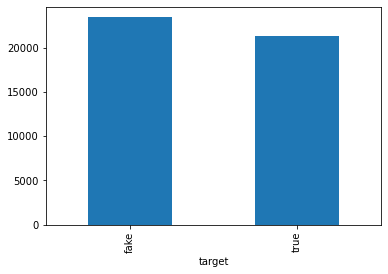

In [27]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()